Enrique Tonatiuh Pérez Cortés Barba

# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [5]:
import pandas as pd
import numpy as np

def montecarlo(f, N, a, b):
    u = np.random.uniform(a,b,N)
    return np.mean(f(u))*(b-a)

N = [10, 100, 1000, 10000, 100000] 
table = pd.DataFrame(columns=["Aproximación f1","Error f1", "Aproximación f2","Error f2"], index=N)

def f1(x):
    return np.exp(x)*np.log(x)

def f2(x):
    return np.sin(x)*np.log(x)


for i in N:
    table.loc[i,"Aproximación f1"] = montecarlo(f1, int(i), 1, 3)
    table.loc[i,"Aproximación f2"] = montecarlo(f2, int(i), 1, 3)
    
table["Error f1"] = np.abs(14.0275- table["Aproximación f1"])
table["Error f2"] = np.abs(0.869844- table["Aproximación f2"])
table

,Aproximación f1,Error f1,Aproximación f2,Error f2
10,4.064148,9.963352,0.897868,0.028024
100,13.553062,0.474438,0.853589,0.016255
1000,14.345326,0.317826,0.869499,0.000345
10000,13.896059,0.131441,0.873105,0.003261
100000,14.074816,0.047316,0.869799,0.000045


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def montecarlo2(region, ax, bx, ay, by, N):
    x = np.random.uniform(ax, bx, N)
    y = np.random.uniform(ay, by, N)
    B = region(x, y)
    AR = (bx - ax)*(by -ay)
    return np.mean(B)*AR

def bernoulli(x,y):
    return (x**2 + 2*y**2 <= -2*x + 8*y - 7)

def error_relativo(AD, AR) :
    return(np.sqrt((1-AD/AR)/(AD/AR)))

AR = (0.5 - (-2.5))*(3 -0)

N = [10, 100, 1000, 10000, 100000] 
table1 = pd.DataFrame(columns=["Aproximación","Error"], index=N)
for i in N:
    AD = montecarlo2(bernoulli, -2.5, 0.5, 0, 3, int(i))
    table1.loc[i,"Aproximación"] = AD
    table1.loc[i,"Error"] = error_relativo(AD, AR)
    
table1

,Aproximación,Error
10,4.5,1.0
100,3.87,1.151339
1000,4.842,0.92668
10000,4.3884,1.025115
100000,4.43628,1.014262


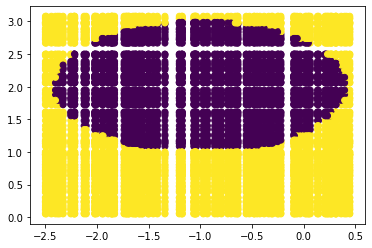

In [6]:
x = np.random.uniform(-2.5, 0.5, 100)
y = np.random.uniform(0, 3.1, 100)
X,Y = np.meshgrid(x,y)

plt.figure()
plt.scatter(X, Y, c=~bernoulli(X,Y))

3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

**1. Valuación de opciones europeas**

En finanzas matemáticas un problema frecuente es el valuar instrumentos financieros cuyos rendimientos son aleatorios. Por ejemplo los instrumentos de renta variable, las inversiones en la bolsa o los derivados, cuyos rendimientos dependen del comportamiento de una acción o de un bien como el oro o el petróleo.

En este particular caso se valúan opciones europeas, una opción europea es un contrato entre dos personas para adquirir o vender un bien o un activo llamado subyacente a un precio y en una fecha fijados de antemano. A la fecha se le llama fecha de maduración y al precio se le conoce como precio de ejercicio. Si la opción es de compra se llama un call, si es de venta se llama un put.

En una opción siempre hay dos partes: por un lado, quien compra la opción y por otro quien la suscribe. El primero adquiere el derecho, pero no la obligación, de ejercer la opción en la fecha de maduración, en cambio, la contra-parte se obliga a cumplir el contrato, independientemente de o que convenga a sus intereses.

Aquí se utiliza la integración montecarlo para calcular una integral que arroja la valuación de la opción europea.

Referencia:
Saavedra, P. & Ibarra, V. (s. f.). *El método Monte-Carlo y su aplicación a finanzas*. Universidad Autónoma Metropolitana. http://mat.izt.uam.mx/mat/documentos/notas%20de%20clase/cfenaoe3.pdf

**2. Valuación de opciones asiáticas**

Las opciones europeas dependen sólo del valor que tiene el subyacente (activo real o financiero en el que se basan) en el instante que se ejerce. Por ejemplo, para el caso de una opción europea, si al final del tiempo de maduración el precio sufre un cambio fuerte, la opción cambiaría bruscamente. Una forma de evitar estos cambios repentinos en el precio de la opción, es suscribir un contrato sobre el valor promedio del precio del subyacente.

El hecho de que el pago en el momento de ejercicio dependa de una media, posibilita muchos usos para este tipo de opciones. Debido a que fue el Banco Trust de Tokio la primera institución financiera que ofreció este tipo de opciones, se les denomina opciones asiáticas.

Aquí se utiliza la integración montecarlo para calcular una integral que arroja la valuación de la opción asiática.

Referencia:
Saavedra, P. & Ibarra, V. (s. f.). *El método Monte-Carlo y su aplicación a finanzas*. Universidad Autónoma Metropolitana. http://mat.izt.uam.mx/mat/documentos/notas%20de%20clase/cfenaoe3.pdf

**3. Evalaución de la cartera**

Se le conoce como portafolio o cartera de inversiones al conjunto de activos financieros que están en propiedad de un inversionista. Puede incluir bonos, acciones, monedas, efectivo, materias primas, productos derivados y muchos activos más.

Los métodos de Monte Carlo se utilizan para la evaluación de la cartera. Aquí, para cada muestra, se simula el comportamiento correlacionado de los factores que impactan en los instrumentos que componen la cartera a lo largo del tiempo, se calcula el valor resultante de cada instrumento y luego se observa el valor de la cartera. Se utiliza un enfoque similar para calcular el valor en riesgo, una aplicación más conocida de la simulación a las carteras.

Referencia:
tok.wiki. (s. f.). *Métodos de Monte Carlo en finanzas Descripción general y Aplicabilidad*. https://hmong.es/wiki/Monte_Carlo_methods_in_finance